# Exploratory Data Analysis (EDA) of Brain Tumor MRI Image Augmentations

This notebook performs exploratory data analysis (EDA) focused on **visualizing and validating the image augmentation pipeline** for the brain tumor classification dataset.  
The dataset consists of MRI scans grouped into four categories:

- **Glioma**
- **Meningioma**
- **No Tumor**
- **Pituitary Tumor**

## Objectives
- Randomly select two sample images from each tumor category in the training dataset.
- Apply a predefined augmentation pipeline to each selected image.
- Visualize both the original and augmented images for inspection.
- Assess augmentation diversity and ensure transformations maintain medical interpretability.

## Augmentation Pipeline
The augmentation transformations applied in sequence are:
1. **Random Rotation** (±15°)
2. **Random Horizontal Flip** (50% probability)
3. **Color Jitter** (±10% variation in brightness and contrast)

Each image is augmented three times, producing **one original + three unique augmented versions**.


In [ ]:
import os, random
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from pathlib import Path

In [41]:
# Set up directories
training_dir = Path("C:/Users/tomla/Documents/Projects/brain_tumor_classifier/data/training/")
testing_dir = Path("C:/Users/tomla/Documents/Projects/brain_tumor_classifier/data/testing/")

training_subfolders = [f for f in os.listdir(training_dir) if os.path.isdir(os.path.join(training_dir, f))]
testing_subfolders = [f for f in os.listdir(testing_dir) if os.path.isdir(os.path.join(testing_dir, f))]

OUTPUT_EDA_AGUMENTATIONS = "C:/Users/tomla/Documents/Projects/brain_tumor_classifier/outputs/eda/agumentations/"

In [42]:
# Vizualize random examples of training data agumentations

# Get images grouped by folder
# Collect images per folder
folder_training = {
    folder.name: [str(p) for p in folder.iterdir() if p.suffix.lower() in {'.jpg', '.png', '.webp'}]
    for folder in training_dir.iterdir() if folder.is_dir()
}

# Pick 2 random images from each folder
training_imgs = {
    key: random.sample(value, k=min(2, len(value))) for key, value in folder_training.items()   
}


In [43]:
# Define agumentation pipeline
transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
])

augmented_images = {}
num_agus = 3

# Apply aggumentation pipeline to the chosen images
for folder, images in training_imgs.items():
    augmented_images[folder] = []
    for image_path in images:
        img = Image.open(image_path).convert("RGB")

        # First slot is the original image
        versions = [img]
        for _ in range(num_agus):
            versions.append(transform(img))
        augmented_images[folder].append(versions)

In [47]:
scientific_names = {
    "glioma_tumor": "Glioma",
    "meningioma_tumor": "Meningioma",
    "no_tumor": "No Tumor",
    "pituitary_tumor": "Pituitary Adenoma"
}

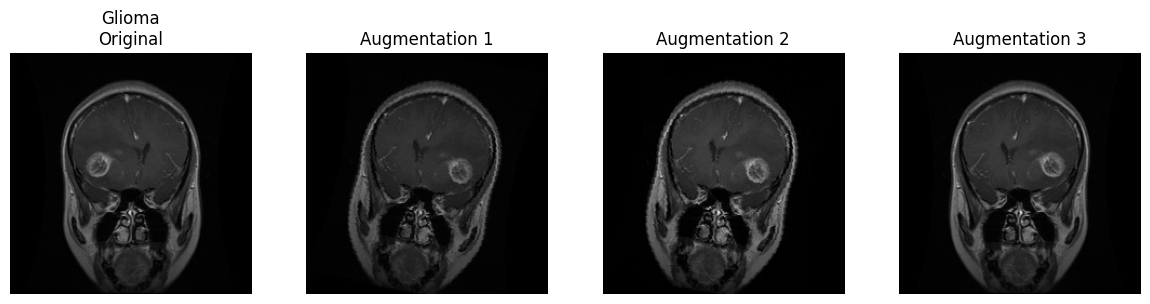

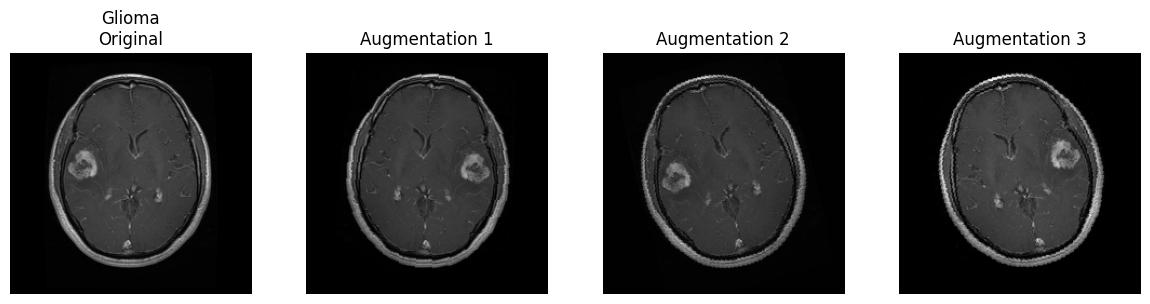

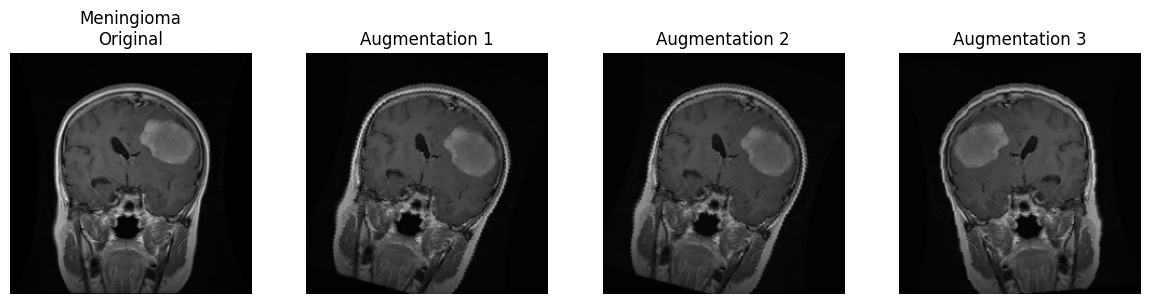

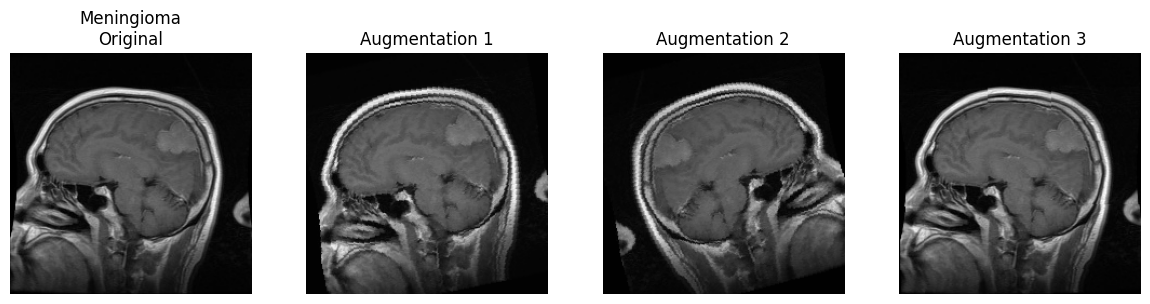

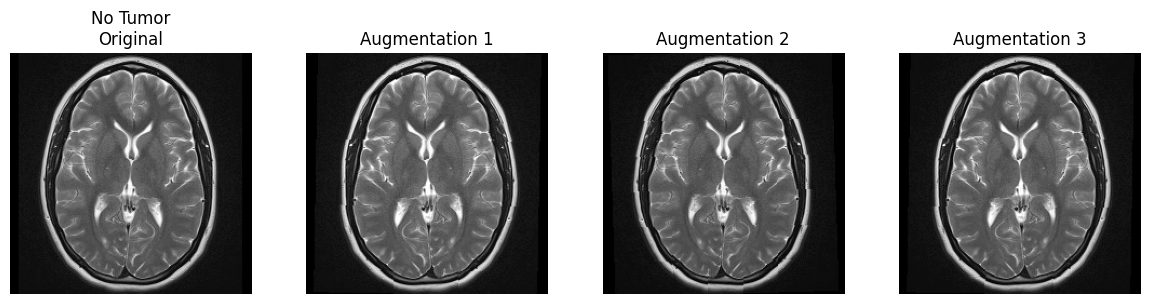

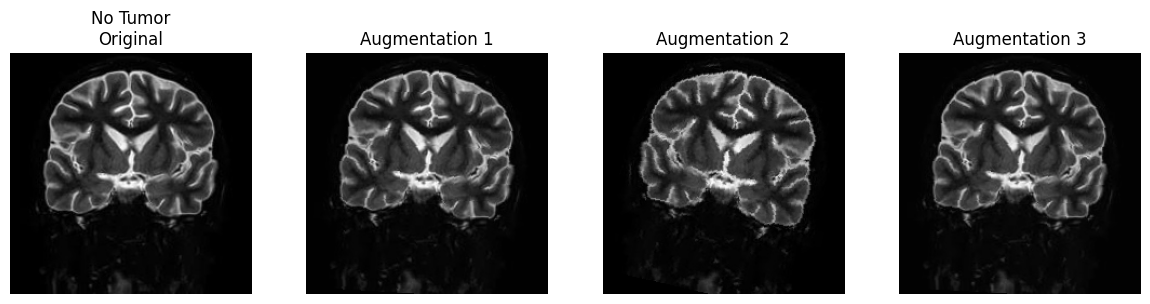

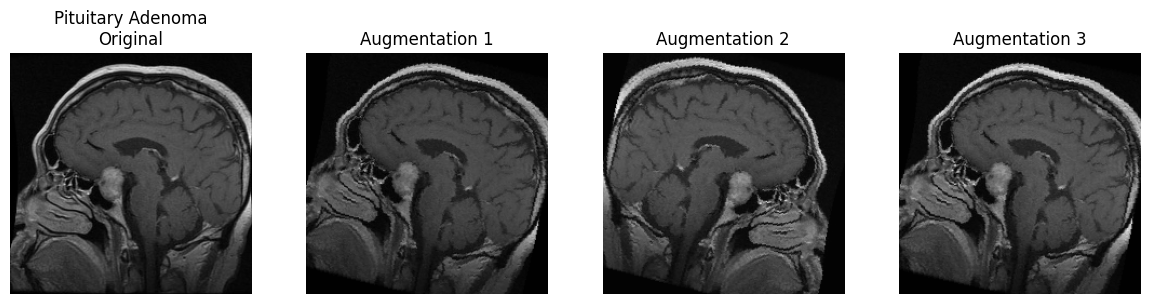

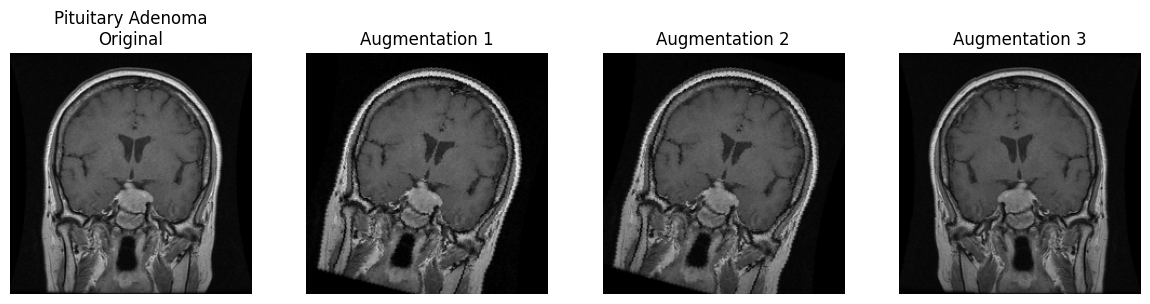

In [51]:
# Display the agumentations
# Plot
for folder, image_sets in augmented_images.items():
    agu_img = 0
    for versions in image_sets:
        plt.figure(figsize=(12, 3))
        for i, img in enumerate(versions):
            ax = plt.subplot(1, len(versions), i+1)
            if i == 0:
                name = scientific_names[folder]
                ax.set_title(f"{name}\nOriginal")
            else:
                ax.set_title(f"Augmentation {i}")
            plt.imshow(img)
            ax.axis("off")
        plt.tight_layout()

        # Save the plot
        os.makedirs(OUTPUT_EDA_AGUMENTATIONS, exist_ok=True)
        plt.savefig(os.path.join(OUTPUT_EDA_AGUMENTATIONS, f"{name}_agumentations_{agu_img}.png"))
        agu_img += 1
        plt.show()

## Summary

The augmentation pipeline was successfully applied to **two random samples from each of the four tumor categories** in the training set, resulting in a total of 8 originals and 24 augmented images.  
Key observations:

- **Consistency:** All augmented images retained clear tumor structures, ensuring diagnostic relevance.
- **Diversity:** Random rotations, flips, and slight color variations introduced noticeable but realistic changes, increasing dataset variability.
- **Balance:** Each category received the same number of original and augmented samples, supporting class balance in downstream model training.

These results confirm that the augmentation strategy effectively increases dataset diversity while preserving the medical validity of the MRI scans, making it suitable for use in the classification model pipeline.
